# Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Standard imports
import os
import joblib

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Sklearn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# local imports

In [3]:
sns.set()

# Load Data

We will be loading the Iris flower dataset using scikit-learn's built in datasets.

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem are we trying to sovle?

We are trying to use attributes of flowers to predic the species of the flower. Specifically, we are going to 
use the sepa length and width and the petal length and width to predict if an Iris flower is of type _Setosa_,
_Versicolor_, or _Virginica_.

This is a multiclass classification problem.


# Create a pandas DataFrame from the data
We will use a pandas DataFrame to do EDA (Exploratory Data Analysis) on the Iris dataset. This package lets us easily manipulate and transform the data.

In [11]:
df = pd.DataFrame(data["data"], columns = data["feature_names"])

In [12]:
# Creating new column "target" as target feature for our models
df["target"] = data["target"]

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [14]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Basic Cleaning

In [15]:
# Drop duplicates
df = df.drop_duplicates()

# Renaming columns
column_names = {'sepal length (cm)' : 'sepal_length', 'sepal width (cm)':'sepal_width', 
                'petal length (cm)':'petal_length', 'petal width (cm)':'petal_width', 'target':'target'}
df = df.rename(columns = column_names)

In [16]:
# Creating new column for target names
df["target_name"] = df["target"].map({0:'setosa', 1:'versicolo', 2:'virginica'})

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Distributions of features and targets

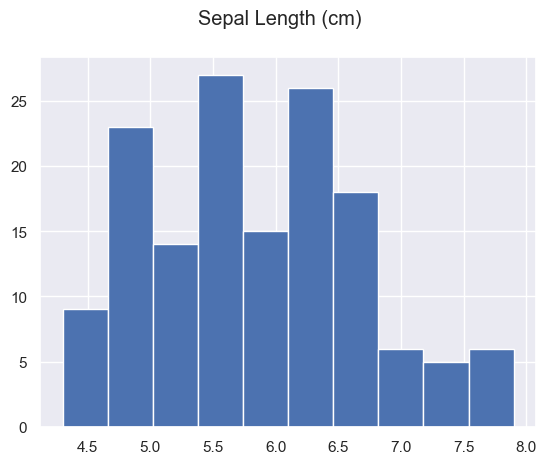

In [18]:
df["sepal_length"].hist()
plt.suptitle("Sepal Length (cm)")
plt.show()

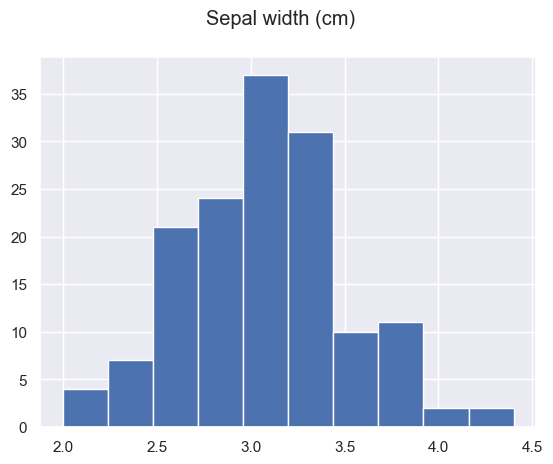

In [19]:
df["sepal_width"].hist()
plt.suptitle("Sepal width (cm)")
plt.show()

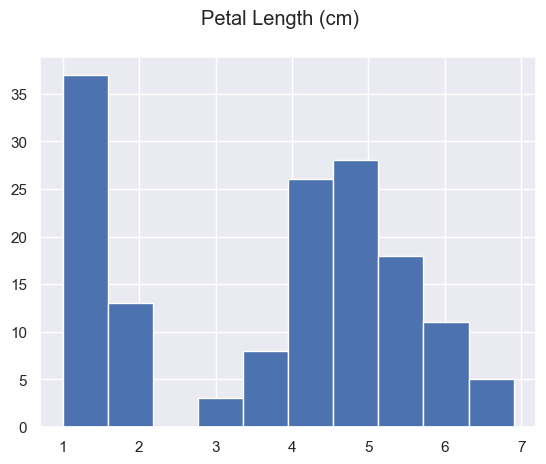

In [20]:
df["petal_length"].hist()
plt.suptitle("Petal Length (cm)")
plt.show()

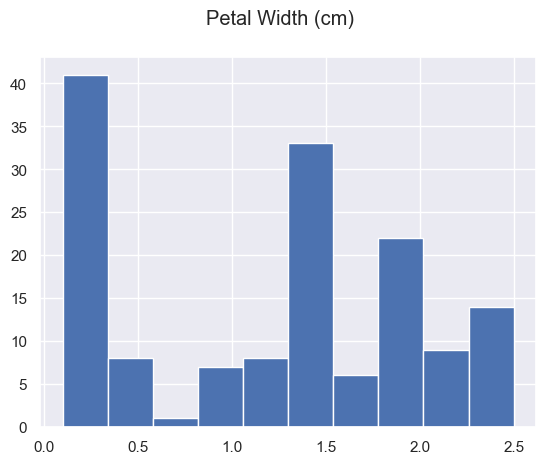

In [21]:
df["petal_width"].hist()
plt.suptitle("Petal Width (cm)")
plt.show()

# Exploratory Data Analysis (EDA)

### Replots
Will help us find the relationships between our features and target

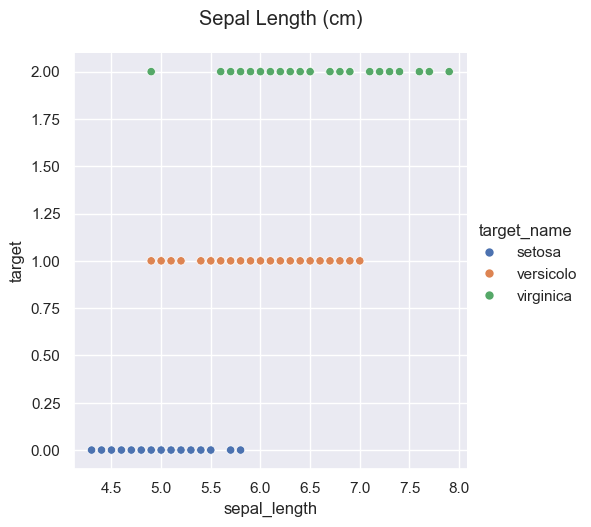

In [22]:
x = "sepal_length"
y = "target"
sns.relplot(x=x, y=y, hue="target_name", data=df)
plt.suptitle("Sepal Length (cm)", y=1.05)
plt.show()

Text(0.5, 1.05, 'Sepal Width (cm)')

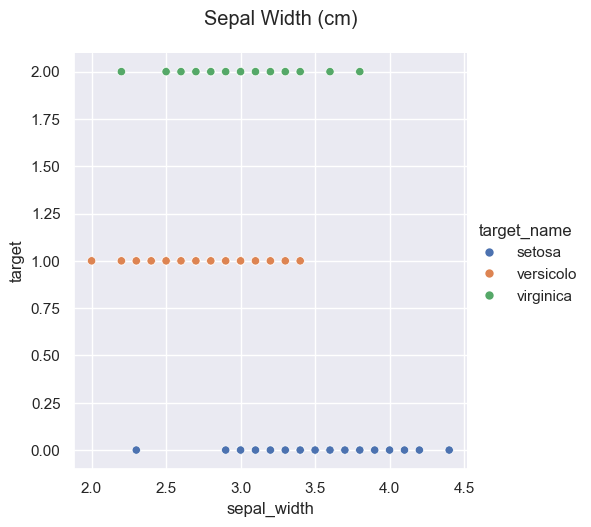

In [23]:
x = "sepal_width"
y = "target"
sns.relplot(x=x, y=y, hue="target_name", data=df)
plt.suptitle("Sepal Width (cm)", y=1.05)

Text(0.5, 1.05, 'Petal Length (cm)')

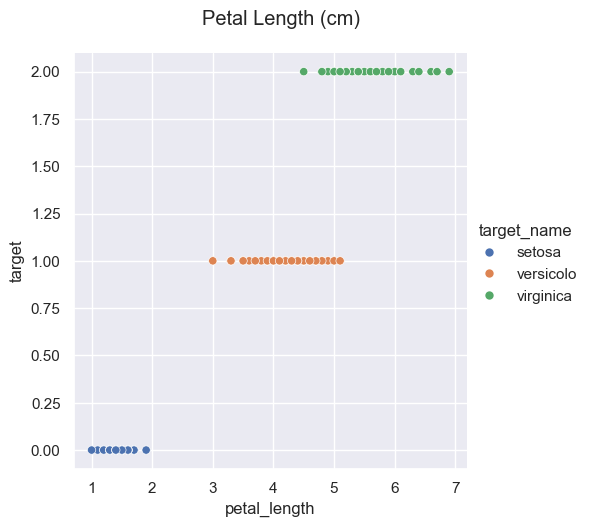

In [24]:
x = "petal_length"
y = "target"
sns.relplot(x=x, y=y, hue="target_name", data=df)
plt.suptitle("Petal Length (cm)", y=1.05)

Text(0.5, 1.05, 'Petal Width (cm)')

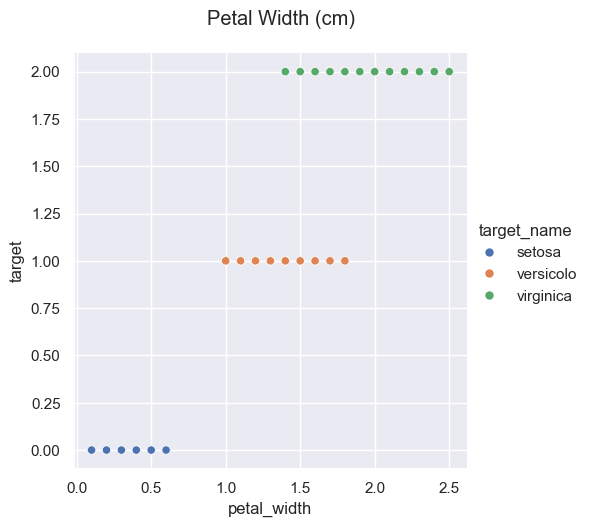

In [25]:
x = "petal_width"
y = "target"
sns.relplot(x=x, y=y, hue="target_name", data=df)
plt.suptitle("Petal Width (cm)", y=1.05)

### Pairplots

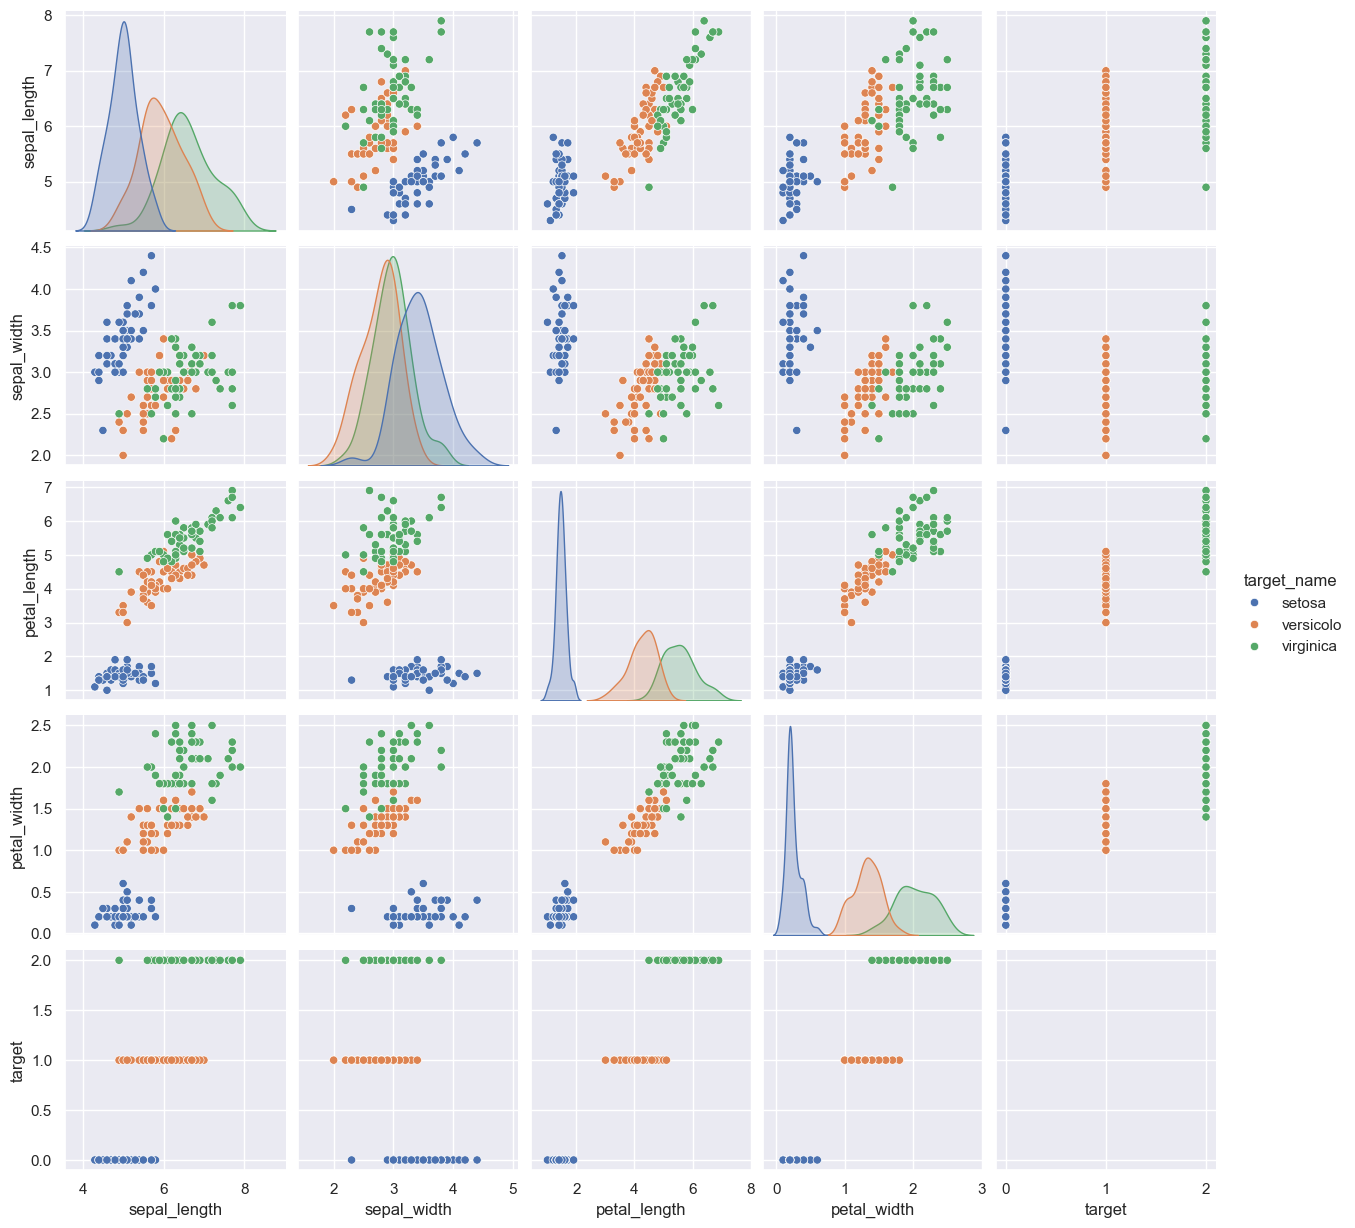

In [26]:
sns.pairplot(df, hue="target_name")

# Preparing our data for modeling
This involves creating training and test data, aswell as splitting data back into NumPy arrays.

In [27]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [28]:
df_train.shape

(111, 6)

In [29]:
df_test.shape

(38, 6)

In [30]:
X_train = df_train.drop(columns=["target", "target_name"]).values
y_train = df_train["target"].values

In [31]:
# Note: This will be used in the end for final validation
X_test = df_test.drop(columns=["target", "target_name"]).values
y_test = df_test["target"].values

# Modeling - What is our baseline?
What is the simplest model we can think of? 

In this case, if our baseline model is randomly guessing the species of flower, we would expect the model to have an accuracy of ~ 0.33 or 33%, since we have 3 different classes that are evenly balanced. 

This sets a baseline since our models should now aim to beat an accu

# Modeling - Simple manual model

In [32]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
def single_feature_prediction(petal_length):
    """ Predicts the Iris species given the petal length. """
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [34]:
df_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'target_name'],
      dtype='object')

In [35]:
X_train[:, 2]

array([4.9, 1.4, 3.3, 4.6, 1.6, 5.8, 6.6, 1.3, 4.6, 1.5, 4.7, 4.8, 3.7,
       5. , 1. , 5.9, 5.5, 5.3, 4.2, 5.7, 3.3, 3.9, 5.6, 1.7, 4.2, 4.5,
       4.4, 6.3, 1.5, 4.5, 4.4, 5.1, 1.7, 1.5, 4.2, 4.4, 1.5, 1.6, 1.4,
       5.6, 4.1, 1.5, 5.3, 4.8, 1.5, 1.5, 4.1, 1.4, 1.6, 1.5, 1.5, 5. ,
       3.8, 4.9, 1.4, 5.7, 5.6, 5.1, 1.9, 6.4, 1.4, 5. , 4. , 4.9, 1.4,
       3.5, 4.8, 5.4, 6.7, 5. , 1.6, 1.3, 1.4, 1.9, 4.6, 4.7, 3. , 1.3,
       5.1, 4.5, 4. , 1.1, 4.9, 1.4, 1.4, 4.7, 5.2, 4. , 1.5, 1.2, 6.9,
       3.9, 6.1, 5.5, 4.5, 1.4, 5.2, 4.3, 1.5, 6.1, 4.5, 1.6, 1.5, 5.6,
       5.8, 4.1, 1.3, 1.4, 1.4, 3.5, 5.1])

In [36]:
manual_y_prerdictions = np.array([single_feature_prediction(val) for val in X_train[:, 2]])

In [37]:
manual_model_accuracy = np.mean(manual_y_prerdictions == y_train)

In [38]:
print(f"Manual model accuracy: {manual_model_accuracy*100:.2f}%")

Manual model accuracy: 93.69%


# Modeling - Logistic Regression

### Using a validation set to evaluate our model

In [39]:
model = LogisticRegression(max_iter=200)

In [40]:
# Xt stands for "X_train", and Xv stands for "X_validation"
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [41]:
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [42]:
y_pred = model.predict(Xv)

In [43]:
model.score(Xv, yv)

0.9285714285714286

### Using Cross validation to evaluate our model

In [44]:
model = LogisticRegression(max_iter=200)

In [45]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [46]:
print(f"Average accuracy: {np.mean(accuracies)*100:.2f}%")

Average accuracy: 94.58%


# Where are we misclassifying points?

In [47]:
y_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [48]:
predicted_correctly_mask = y_pred == y_train
predicted_incorrectly_mask = y_pred != y_train

In [49]:
X_train[predicted_incorrectly_mask]

array([[5.9, 3.2, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5],
       [6. , 3. , 4.8, 1.8],
       [6.7, 3. , 5. , 1.7]])

### Creating new dataFrame for plotting

In [50]:
df_predictions = df_train.copy()
df_predictions["correct_prediction"] = predicted_correctly_mask
df_predictions["prediction"] = y_pred
df_predictions["prediction_label"] = df_predictions["prediction"].map({0:'setosa', 1:'versicolo', 2:'virginica'})

In [51]:
df_predictions.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,target_name,correct_prediction,prediction,prediction_label
72,6.3,2.5,4.9,1.5,1,versicolo,True,1,versicolo
4,5.0,3.6,1.4,0.2,0,setosa,True,0,setosa
57,4.9,2.4,3.3,1.0,1,versicolo,True,1,versicolo
54,6.5,2.8,4.6,1.5,1,versicolo,True,1,versicolo
29,4.7,3.2,1.6,0.2,0,setosa,True,0,setosa
129,7.2,3.0,5.8,1.6,2,virginica,True,2,virginica
105,7.6,3.0,6.6,2.1,2,virginica,True,2,virginica
38,4.4,3.0,1.3,0.2,0,setosa,True,0,setosa
91,6.1,3.0,4.6,1.4,1,versicolo,True,1,versicolo
15,5.7,4.4,1.5,0.4,0,setosa,True,0,setosa


### Scatter Plots

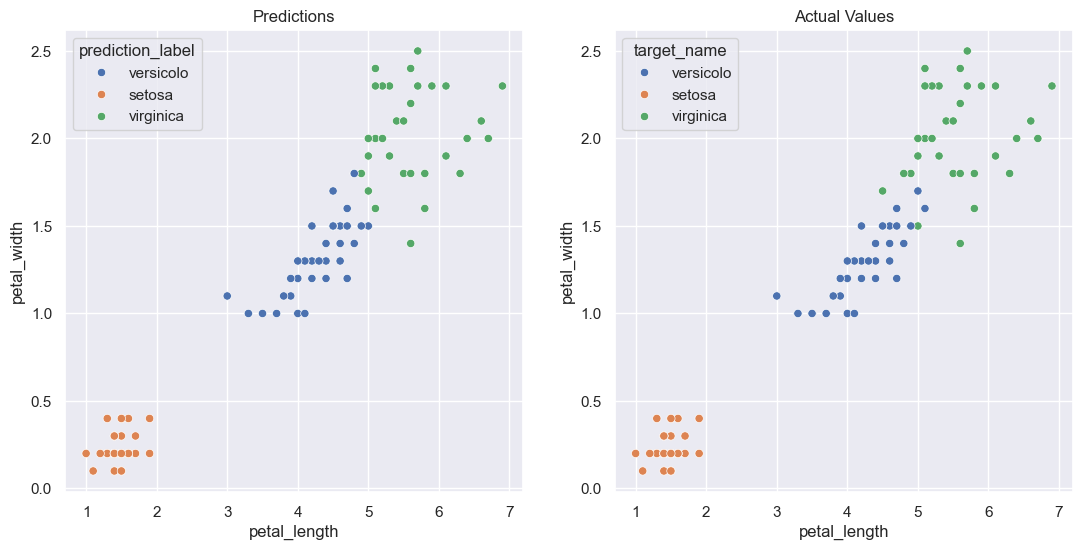

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.scatterplot(x="petal_length", y="petal_width", hue="prediction_label", data=df_predictions, ax=axes[0])
axes[0].set_title("Predictions")

sns.scatterplot(x="petal_length", y="petal_width", hue="target_name", data=df_predictions, ax=axes[1])
axes[1].set_title("Actual Values")

plt.show()

In [53]:
def plot_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    axs = axs.flatten()

    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="target_name", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

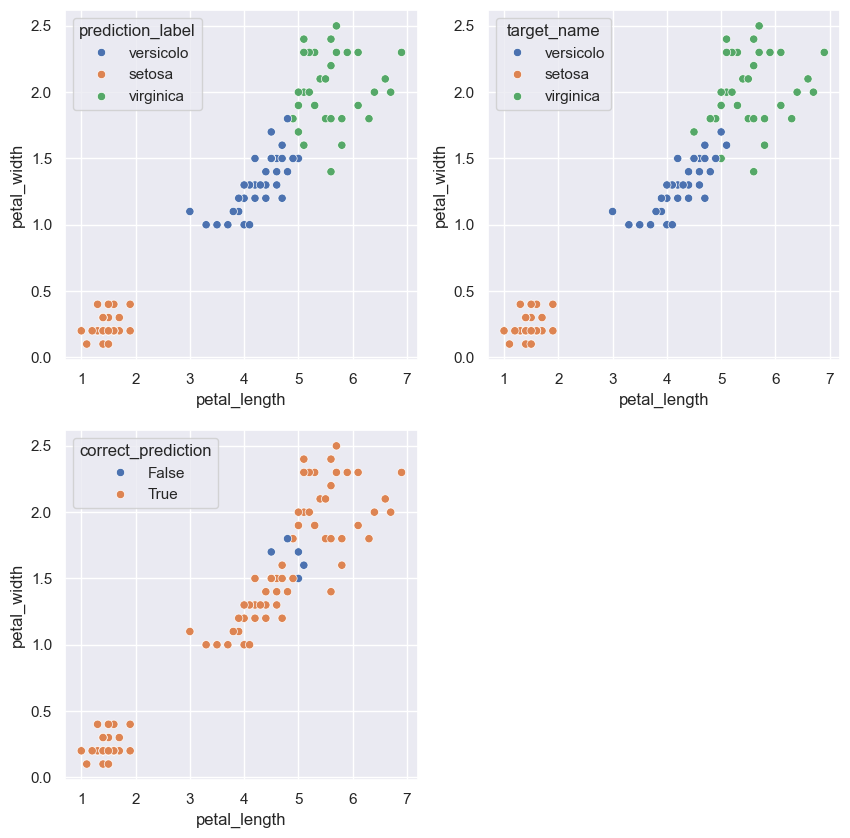

In [54]:
plot_predictions(df_predictions, "petal_length", "petal_width")

### Heatmap for confusion matrix
What is a confusion matrix? 

A confusion matrix offers insights on model performance by showing true positives, true negatives, false positives, and false negatives. 

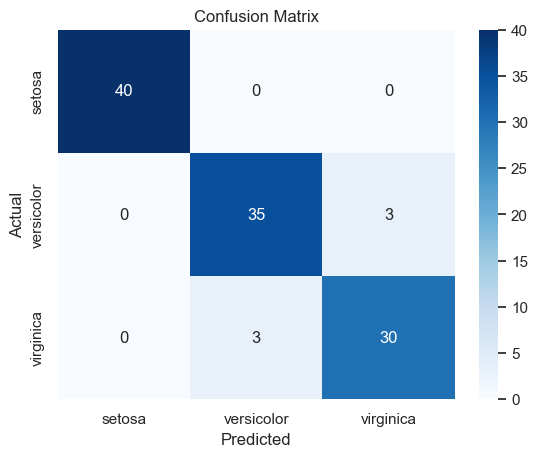

In [55]:
conf_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data["target_names"], yticklabels=data["target_names"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Interpreting the visual

What does the visual show? 

The model perfectly classified all Setosa specices. The model incorrectly predicted 1 Versicolor as Virginica, and 3 Virginica as Versicolor. 

This shows that the model is very good at classifying Setosa, as there is clear class seperation for this species, but sometimes struggles with Versicolor and Virginica as there is slight overlap in features for these two species. 

# Model Tuning

What is model tuning? 

Model tuning is trying to determine the parameters of your model (these are also known as "hypterparameters") that maximize the model performance. 

We will go through a "manual" iterative method, then a more "automatic" method by sklearn.

In [56]:
# Iteratively testing different values of C
for reg_param in (0.5, 0.7, 0.9, 1.1, 1.9, 2, 3, 5, 10, 20, 50, 100):
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"Average accuracy with C={reg_param}: {np.mean(accuracies)*100:.2f}%")

Average accuracy with C=0.5: 94.58%
Average accuracy with C=0.7: 94.58%
Average accuracy with C=0.9: 94.58%
Average accuracy with C=1.1: 94.58%
Average accuracy with C=1.9: 95.49%
Average accuracy with C=2: 95.49%
Average accuracy with C=3: 96.40%
Average accuracy with C=5: 96.40%
Average accuracy with C=10: 96.40%
Average accuracy with C=20: 97.31%
Average accuracy with C=50: 97.31%
Average accuracy with C=100: 97.31%


In [57]:
# Testing different values of C and penalty using GridSearch
param_grid = {
    'C': [0.5, 0.7, 0.9, 1.1, 1.9, 2, 3, 5, 10, 20, 50, 100]
}
model = LogisticRegression(max_iter=200)

grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_ *100:.2f}")

Best parameters: {'C': 20}
Best score: 97.31


As you can see, we found the best parameter for C using the manual iterative method vs GridSearch. The benefit of GridSearch is that it also lets us input more than one parameter in the param_grid, which is usefull for more complex models. 

# Final Model

In [58]:
finalModel = LogisticRegression(max_iter=200, C=1.1)

Train our final model using our full Training Dataset

In [59]:
finalModel.fit(X_train, y_train)


LogisticRegression(C=1.1, max_iter=200)

In [60]:
# We are going to use the X_test, y_test to predict and score the model. 
# These were defined earlier in the notebook. 
y_test_pred = finalModel.predict(X_test)

In [61]:
print(f"Final model accuracy: {finalModel.score(X_test, y_test) * 100:.2f}%")

Final model accuracy: 97.37%


# Plotting the results

In [62]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = y_test_pred == y_test
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0:'setosa', 1:'versicolo', 2:'virginica'})
df_predictions_test.head()

,sepal_length,sepal_width,petal_length,petal_width,target,target_name,correct_prediction,prediction,prediction_label
68,6.2,2.2,4.5,1.5,1,versicolo,True,1,versicolo
125,7.2,3.2,6.0,1.8,2,virginica,True,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica,True,2,virginica
55,5.7,2.8,4.5,1.3,1,versicolo,True,1,versicolo
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica


### Scatter Plot

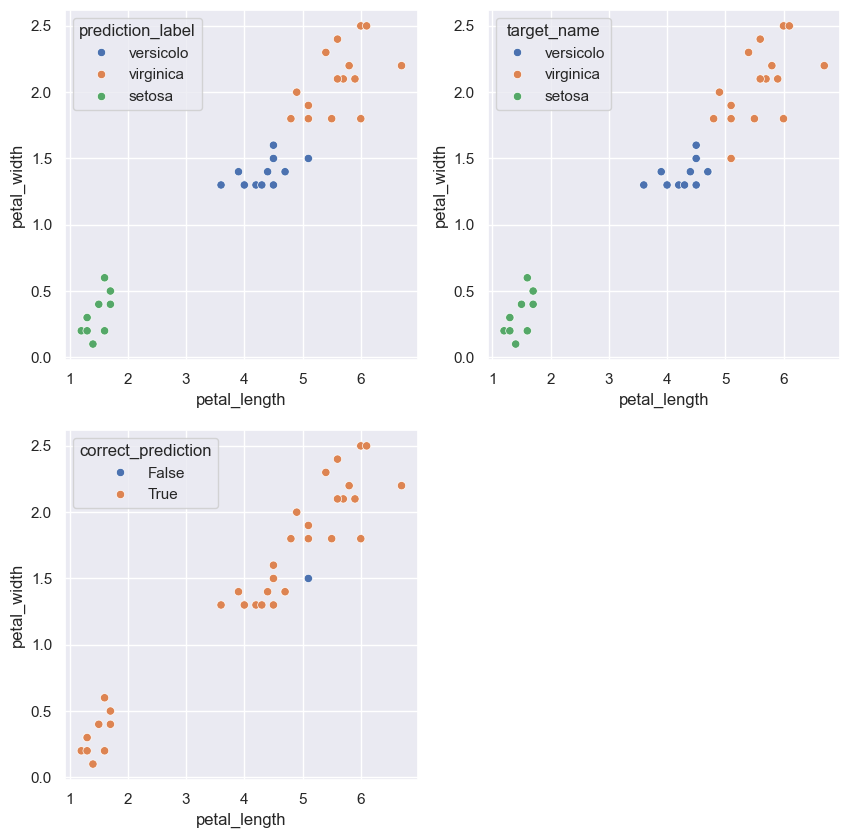

In [63]:
plot_predictions(df_predictions_test, "petal_length", "petal_width")

### Confusion Matrix

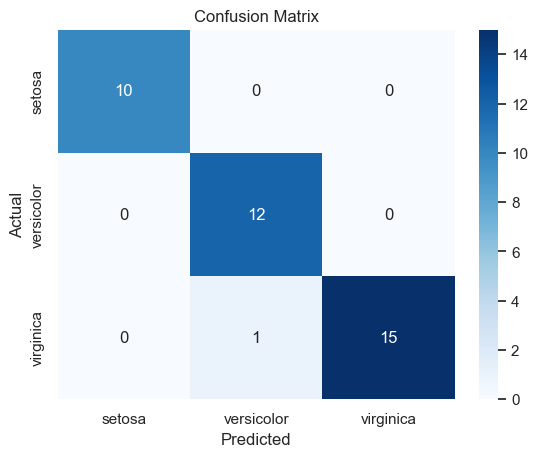

In [64]:


conf_matrix_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=data["target_names"], yticklabels=data["target_names"]
            )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# In Conclusion...
In conclusion, we achieved a 97% accuracy on the test dataset using a LogisticRegression classification model using these model parameters: 

```python
LogisticRegression(C=1.1, max_iter=200) 
```

### Saving the model for use in web app

In [66]:
# Ensure the directory exists
os.makedirs("../models", exist_ok=True)

# Save the model
joblib.dump(finalModel, "../models/iris_model.pkl")


['../models/iris_model.pkl']